In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("covid_data.csv")

In [3]:
print(df.head())
print(df.shape)
print(df.columns)

         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  
(35156, 10)
Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
countries = ["India", "US", "Brazil"]

df_countries = df[df["Country/Region"].isin(countries)]

In [7]:
# Weekly Cases Calculation
weekly_cases = (
    df_countries
    .groupby(["Country/Region", pd.Grouper(key="Date", freq="W")])["New cases"]
    .sum()
    .reset_index()
)


In [8]:
df_countries["7_day_avg"] = (
    df_countries
    .groupby("Country/Region")["New cases"]
    .rolling(window=7)
    .mean()
    .reset_index(0, drop=True)
)


C:\Users\Aftab\AppData\Local\Temp\ipykernel_3928\3967022622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries["7_day_avg"] = (


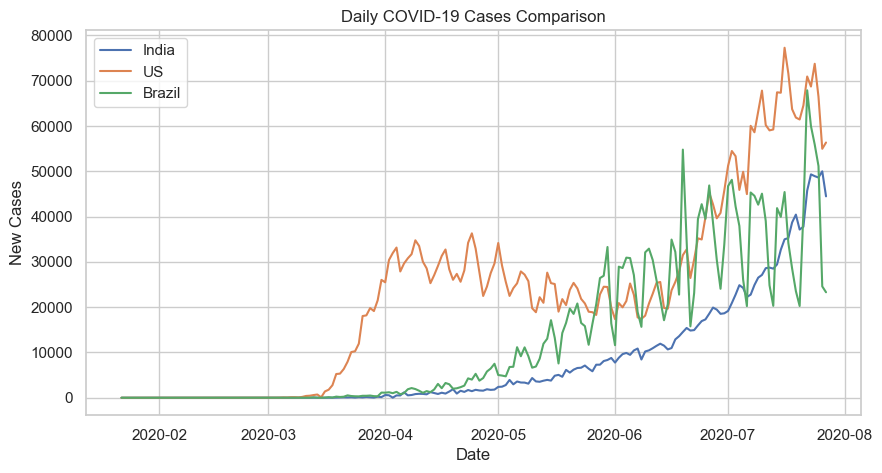

In [20]:
plt.figure(figsize=(10,5))

for country in countries:
    data = df_countries[df_countries["Country/Region"] == country]
    plt.plot(data["Date"], data["New cases"], label=country)

plt.title("Daily COVID-19 Cases Comparison")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.savefig("Daily COVID-19 Cases Comparison.png")
plt.show()


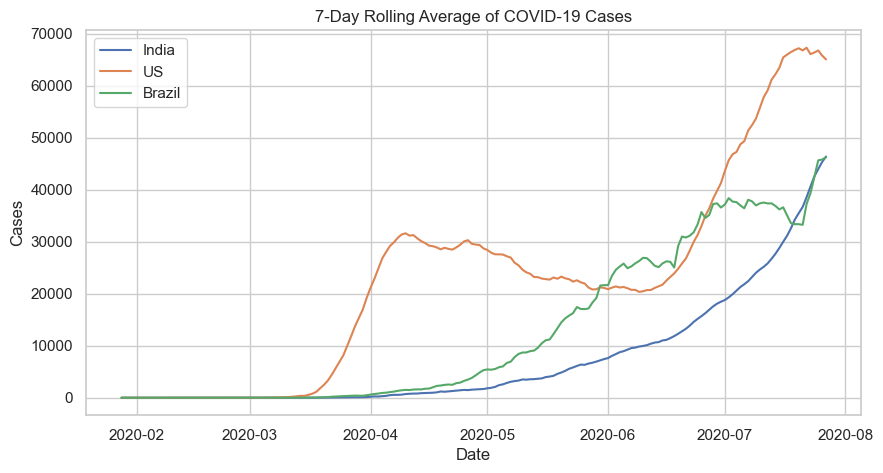

In [21]:
# Rolling Average Plot
plt.figure(figsize=(10,5))

for country in countries:
    data = df_countries[df_countries["Country/Region"] == country]
    plt.plot(data["Date"], data["7_day_avg"], label=country)

plt.title("7-Day Rolling Average of COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.savefig("7-Day Rolling Average of COVID-19 Cases.png")
plt.show()



In [11]:
# Peak Detection
for country in countries:
    data = df_countries[df_countries["Country/Region"] == country]
    peak_row = data.loc[data["New cases"].idxmax()]
    
    print(f"{country} peak:")
    print("Date:", peak_row["Date"].date())
    print("Cases:", peak_row["New cases"])
    print("-" * 30)


India peak:
Date: 2020-07-26
Cases: 49981
------------------------------
US peak:
Date: 2020-07-16
Cases: 77255
------------------------------
Brazil peak:
Date: 2020-07-22
Cases: 67860
------------------------------


C:\Users\Aftab\AppData\Local\Temp\ipykernel_3928\2932381877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["7_day_avg"] = data["New cases"].rolling(7).mean()
C:\Users\Aftab\AppData\Local\Temp\ipykernel_3928\2932381877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["7_day_avg"] = data["New cases"].rolling(7).mean()
C:\Users\Aftab\AppData\Local\Temp\ipykernel_3928\2932381877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

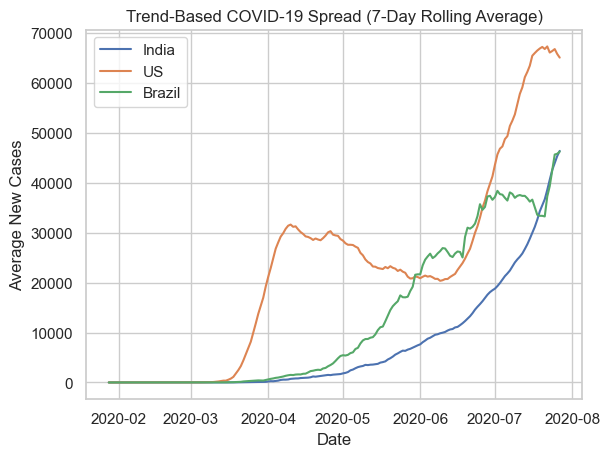

In [25]:
for country in countries:
    data = df[df["Country/Region"] == country]
    
    # 7-day rolling average
    data["7_day_avg"] = data["New cases"].rolling(7).mean()
    
    plt.plot(data["Date"], data["7_day_avg"], label=country)

plt.title("Trend-Based COVID-19 Spread (7-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Average New Cases")
plt.legend()
plt.grid(True)

# Save output
plt.savefig("rolling_average_trend.png")
plt.show()


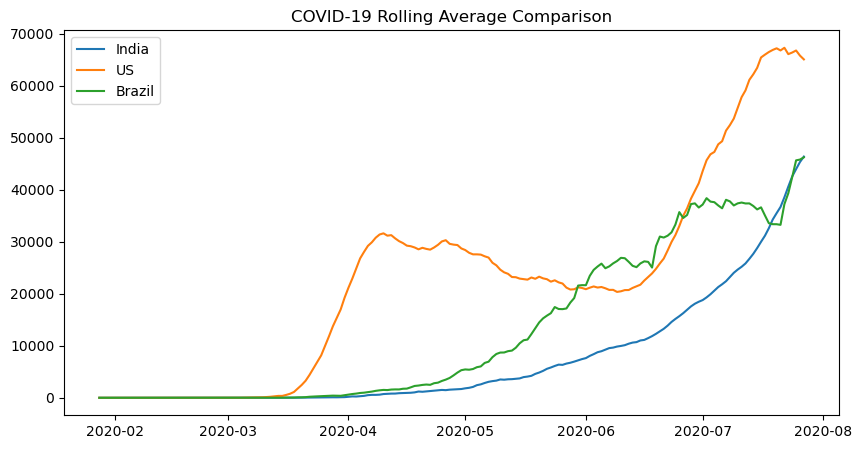

In [13]:
Exporting Graphs

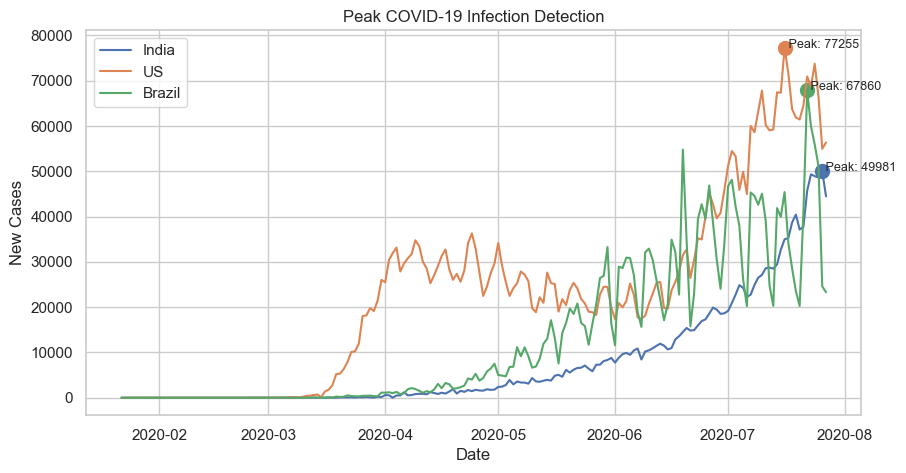

In [27]:
plt.figure(figsize=(10,5))

for country in countries:
    data = df[df["Country/Region"] == country]
    
    # Plot daily cases
    plt.plot(data["Date"], data["New cases"], label=country)
    
    # Find peak
    peak_row = data.loc[data["New cases"].idxmax()]
    
    # Mark peak
    plt.scatter(
        peak_row["Date"],
        peak_row["New cases"],
        s=100,
        marker="o"
    )
    
    # Annotate peak
    plt.text(
        peak_row["Date"],
        peak_row["New cases"],
        f' Peak: {int(peak_row["New cases"])}',
        fontsize=9
    )

plt.title("Peak COVID-19 Infection Detection")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

# Save output
plt.savefig("peak_detection.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import math

# Calculate grid size (e.g., if 6 countries, make it 3x2)
n = len(countries)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4), sharex=False)
axes = axes.flatten() # Flatten to 1D for easy indexing

for i, country in enumerate(countries):
    data = df_countries[df_countries["Country/Region"] == country]
    ax = axes[i]
    
    # Plot line
    ax.plot(data["Date"], data["New cases"], color='steelblue', alpha=0.7)
    
    # Plot peak
    peak_row = data.loc[data["New cases"].idxmax()]
    ax.scatter(peak_row["Date"], peak_row["New cases"], color='red', s=40)
    
    # Labeling
    ax.set_title(f"{country} (Peak: {int(peak_row['New cases']):,})", fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()